### link: http://gambiter.com/chess/players/List_chess_grandmasters_by_country.html

In [42]:
import requests
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from bs4 import BeautifulSoup
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
base_url = "http://gambiter.com/chess/players/List_chess_grandmasters_by_country.html"
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
request = requests.get(base_url)
contents = request.content
readableContent = BeautifulSoup(contents,"html.parser")

In [43]:
tables = readableContent.find("tr",{"style":"vertical-align:text-top;"})
table = tables.find_all("table")
table = table[1]
items = table.find_all("tr")
items = items[1:]
lib = []
for item in items:
    try:
        infos = item.find_all("td")
        data = {}
        data["Country"] = infos[0].text
        data["Active"] = infos[1].text
        data["GrandmastersOverall"] = infos[2].text
        data["GrandmastersActive"] = infos[3].text
        data["InternationalMastersOverall"] = infos[4].text
        data["InternationalMastersActive"] = infos[5].text
        data["TitledOverall"] = infos[6].text
        data["RespresentPlayer"] = infos[7].text
        try:
            data["Continent"] = continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(str(infos[0].text)))]
        except:
            data["Continent"] = "Stupid"
        lib.append(data)
    except:
        print("fk stupid")

In [44]:
datas = pandas.DataFrame(lib)
datas["Active"] = datas.Active.astype(float)
datas["GrandmastersOverall"] = datas.GrandmastersOverall.astype(float)
datas["GrandmastersActive"] = datas.GrandmastersActive.astype(float)
datas["InternationalMastersOverall"] = datas.InternationalMastersOverall.astype(float)
datas["InternationalMastersActive"] = datas.InternationalMastersActive.astype(float)
datas["TitledOverall"] = datas.TitledOverall.astype(float)
datas["% Active and Overall GMs"] = datas["GrandmastersActive"]/datas["GrandmastersOverall"]*100

### Grand masters overal by country

<BarContainer object of 65 artists>

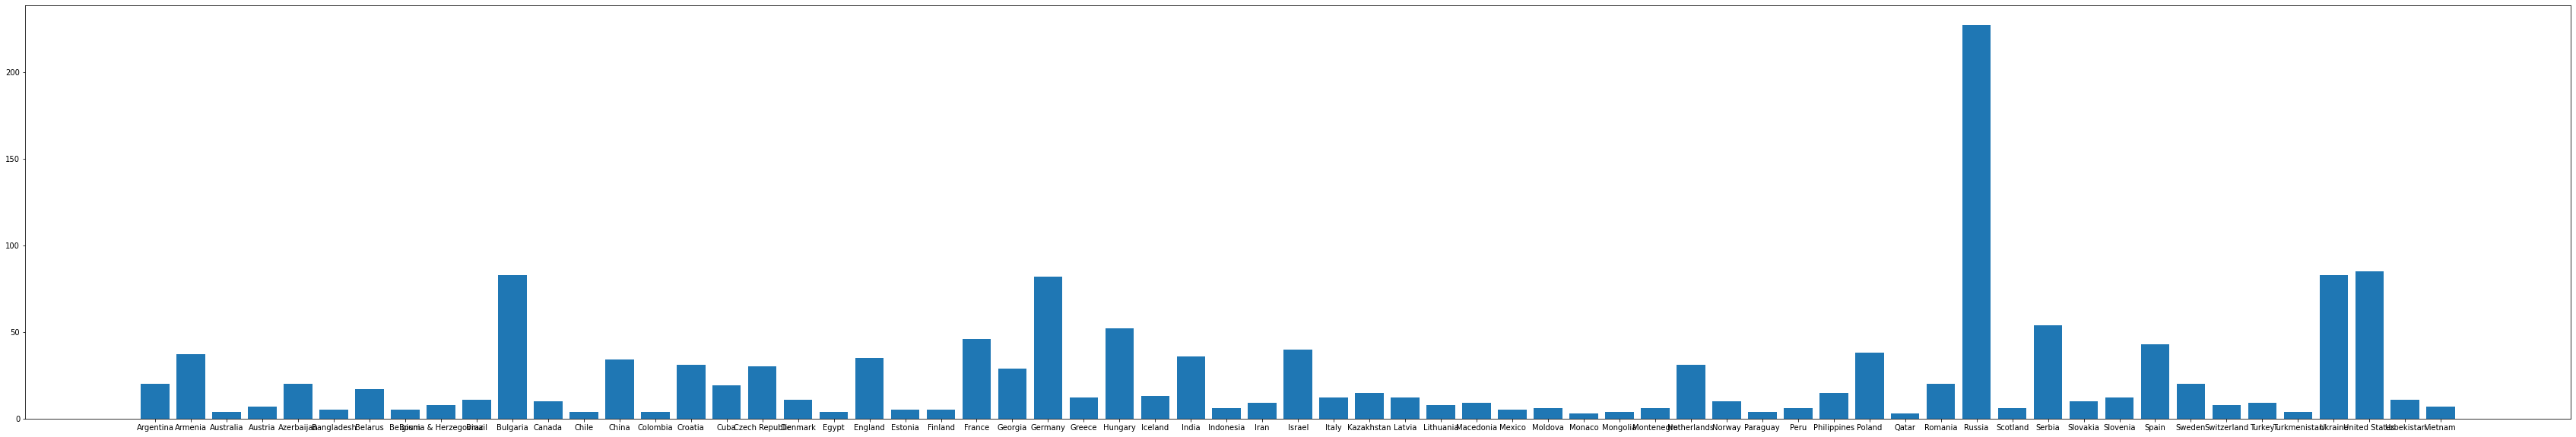

In [51]:
grandmaster_Averange = datas.groupby(['Country']).mean()
plt.figure(figsize=(60,10))
plt.bar(grandmaster_Averange.index,grandmaster_Averange['GrandmastersOverall'])

In [46]:
grandmaster_Averange = datas.groupby(['Country']).mean()
plt.figure(figsize=(75,10))
plt.plot(grandmaster_Averange.index,grandmaster_Averange['GrandmastersOverall'])

,Country,Active,GrandmastersOverall,GrandmastersActive,InternationalMastersOverall,InternationalMastersActive,TitledOverall,RespresentPlayer,Continent,% Active and Overall GMs
0,Russia,158.0,227.0,214.0,503.0,896.0,2248.0,Alexander Grischuk (2795),Europe,94.273128
1,Germany,72.0,82.0,177.0,237.0,789.0,1234.0,Arkadij Naiditsch (2709),Europe,215.853659
2,Ukraine,71.0,83.0,95.0,197.0,280.0,508.0,Vassily Ivanchuk (2744),Europe,114.457831
3,United States,55.0,85.0,55.0,126.0,273.0,633.0,Hikaru Nakamura (2787),North America,64.705882
4,Serbia,45.0,54.0,81.0,111.0,372.0,563.0,Ivan Ivanisevic (2613),Europe,150.000000
...,...,...,...,...,...,...,...,...,...,...
60,Qatar,3.0,3.0,1.0,1.0,5.0,11.0,Mohamad Al-Modiahki (2549),Asia,33.333333
61,Paraguay,3.0,4.0,3.0,3.0,13.0,24.0,Axel Bachmann (2644),South America,75.000000
62,Turkmenistan,3.0,4.0,6.0,8.0,16.0,46.0,Maksat Atabayev (2480),Asia,150.000000
63,Monaco,3.0,3.0,2.0,2.0,10.0,14.0,David Marciano (2506),Europe,66.666667


### Grand masters by Continent

<BarContainer object of 7 artists>

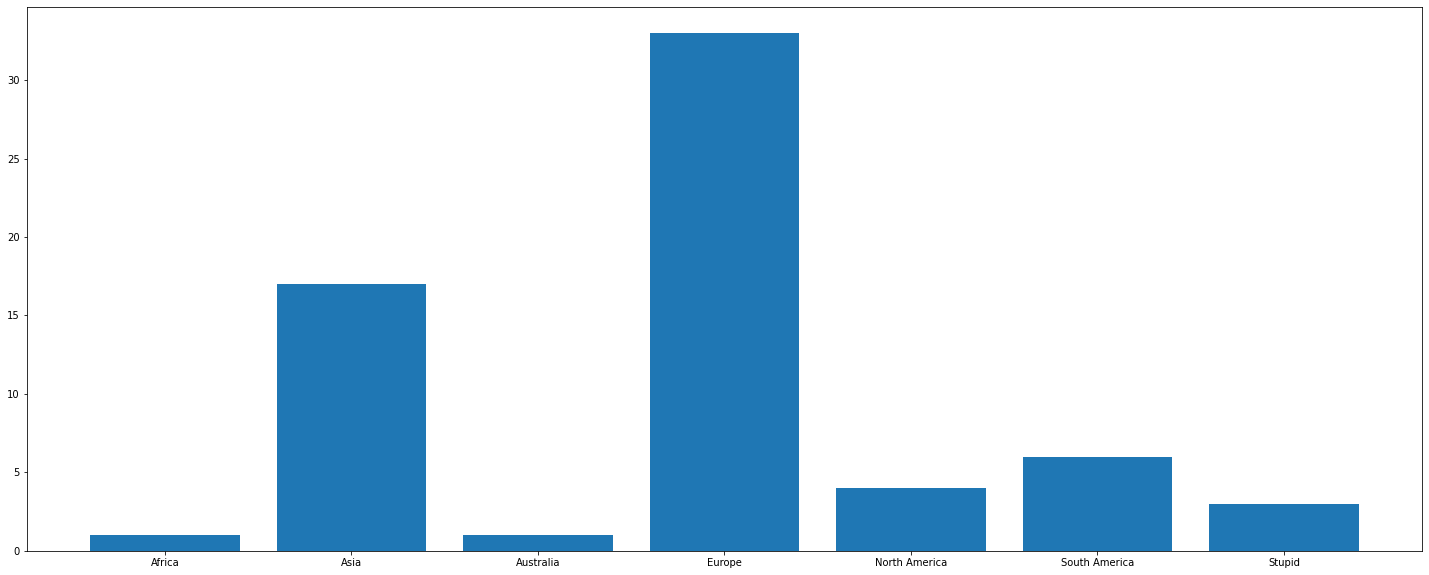

In [49]:
grandmaster_Averange = datas.groupby(['Continent']).count()
plt.figure(figsize=(25,10))
plt.bar(grandmaster_Averange.index,grandmaster_Averange['GrandmastersOverall'])